### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib notebook
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['font.size'] = 20
import seaborn as sns
sns.set(color_codes=True)
from sklearn import linear_model
from sklearn.model_selection import train_test_split


# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [2]:
Total_players={"Total Players":[len(purchase_data["SN"].unique())]}
df=pd.DataFrame(data=Total_players)
df

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
Number_Unique_Item=len(purchase_data["Item ID"].unique())
Average_Price="$"+str(round(purchase_data["Price"].mean(),2))
Number_Purchases=len(purchase_data["Purchase ID"])
Total_Revenue=purchase_data["Price"].sum()
summary = {"Number of Unique Items":[Number_Unique_Item],'Average Price':[Average_Price],
              "Number of Purchases":[Number_Purchases],'Total Revenue':[Total_Revenue]}
Purchasing_Analysis=pd.DataFrame(summary)
Purchasing_Analysis["Total Revenue"]=Purchasing_Analysis["Total Revenue"].map('${:,.2f}'.format)
Purchasing_Analysis
#print(Number_Unique_Item,Average_Price,Number_Purchases,Total_Revenue)


,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [4]:
#by drop duplicate ids
id_unique_df=purchase_data.drop_duplicates("SN")
counts=id_unique_df["Gender"].value_counts()
percentage=id_unique_df["Gender"].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
id_df=pd.DataFrame({'counts':counts,'percentage':percentage})
id_df

,counts,percentage
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


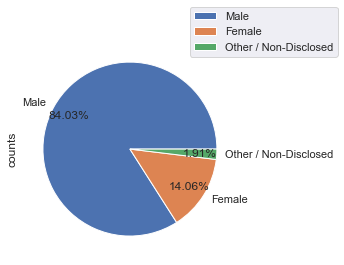

In [5]:
id_df.plot(kind="pie",y="counts", autopct='%1.2f%%',pctdistance=0.8).legend(bbox_to_anchor=(0.75, 0.9))


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [6]:
#calculations
Purchase_Count=purchase_data["Gender"].value_counts()
average_purchase_price=purchase_data.groupby("Gender").mean().round(2)
total_Purchase_Value=purchase_data.groupby("Gender").sum().round(2)
Avg_Total_Purchase_per_Person=(total_Purchase_Value["Price"]/id_df["counts"]).round(2)

#Create a dataframe
Purchasing_Analysis=pd.DataFrame({"Purchase Count":Purchase_Count,
                                 "Average Purchase Price":average_purchase_price["Price"],
                                "Total Purchase Value":total_Purchase_Value["Price"],
                                 "Avg Total Purchase perPerson":Avg_Total_Purchase_per_Person
                                })
Purchasing_Analysis["Average Purchase Price"]=Purchasing_Analysis["Average Purchase Price"].map('${:,.2f}'.format)
Purchasing_Analysis["Total Purchase Value"]=Purchasing_Analysis["Total Purchase Value"].map('${:,.2f}'.format)
Purchasing_Analysis["Avg Total Purchase perPerson"]=Purchasing_Analysis["Avg Total Purchase perPerson"].map('${:,.2f}'.format)
Purchasing_Analysis

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase perPerson
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


([<matplotlib.patches.Wedge at 0x1abd4754358>,
 [Text(-1.9536131984598002, -1.0116301057222796, 'Female'),
  Text(2.1079553629537306, 0.9200674908910799, 'Male'),
  Text(-2.1951727876157734, 0.14565861633008487, 'Other / Non-Disclosed')],
 [Text(-1.0656071991598908, -0.5517982394848797, '15.2%'),
  Text(1.1914530312347171, 0.520038147025393, '82.7%'),
  Text(-1.197366975063149, 0.07945015436186446, '2.1%')])

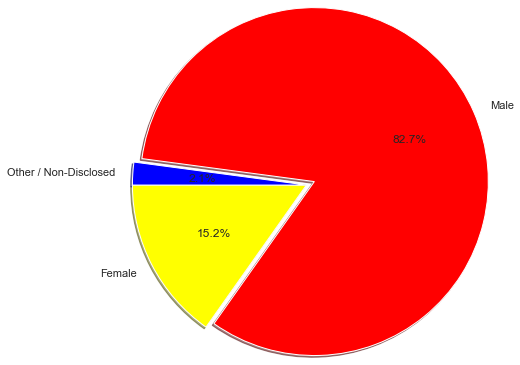

In [7]:
labels=['Female','Male','Other / Non-Disclosed']
sizes=total_Purchase_Value["Price"]
explode = (0.0,0.1,0)
colors = ["yellow","red","blue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180,radius=2)


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [8]:
# assign bins
bins=(0,10,15,20,25,30,35,40,100)
purchase_data_by_bin=id_unique_df.copy()
purchase_data_by_bin["age bin"]=pd.cut(id_unique_df["Age"],bins,labels=['<10','10-14','15-19','20-24',
                                                       '25-29','30-34','35-39','40+'],right=False)
data_groupby_age=purchase_data_by_bin.groupby(["age bin"])

#count bins
bin_counts=data_groupby_age["SN"].count()
percentage_players=(bin_counts/len(id_unique_df["SN"])).mul(100).round(2).astype(str)+"%"

#create a dataframe to store
age_data=pd.DataFrame({'Total Counts':bin_counts,'Percentage of Players':percentage_players})
age_data

,Total Counts,Percentage of Players
age bin,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


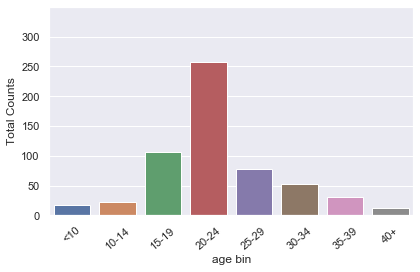

In [9]:
ax=sns.barplot(age_data.index,age_data["Total Counts"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_ylim(0,350)
plt.tight_layout()
plt.yticks(numpy.arange(0, 350, step=50))
plt.show()

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [10]:
# assign bins
bins=(0,10,15,20,25,30,35,40,100)
purchase_data_by_bin=purchase_data.copy()
purchase_data_by_bin["age bin"]=pd.cut(purchase_data["Age"],bins,labels=['<10','10-14','15-19','20-24',
                                                       '25-29','30-34','35-39','40+'],right=False)
data_groupby_age=purchase_data_by_bin.groupby(["age bin"])

#calculate values
bin_purchase_count=data_groupby_age["Purchase ID"].count()
bin_ave_purchase_price=data_groupby_age["Price"].mean().round(2)
bin_total_purchase_price=data_groupby_age["Price"].sum().round(2)
bin_ave_total_purchase_pp=(data_groupby_age["Price"].sum()/age_data["Total Counts"]).round(2)

#Create a dataframe to store all above
Purchasing_Analysis_age=pd.DataFrame({"Purchase Count":bin_purchase_count,
                                 "Average Purchase Price":bin_ave_purchase_price,
                                "Total Purchase Value":bin_total_purchase_price,
                                 "Avg Total Purchase perPerson":bin_ave_total_purchase_pp
                                })
Purchasing_Analysis_age["Average Purchase Price"]=Purchasing_Analysis_age["Average Purchase Price"].map('${:,.2f}'.format)
Purchasing_Analysis_age["Total Purchase Value"]=Purchasing_Analysis_age["Total Purchase Value"].map('${:,.2f}'.format)
Purchasing_Analysis_age["Avg Total Purchase perPerson"]=Purchasing_Analysis_age["Avg Total Purchase perPerson"].map('${:,.2f}'.format)
Purchasing_Analysis_age

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase perPerson
age bin,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


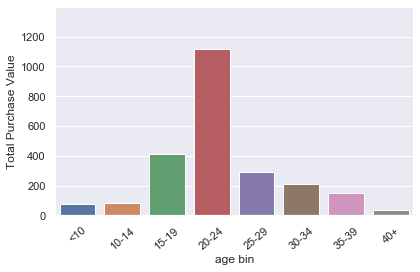

In [11]:
ax1=sns.barplot(Purchasing_Analysis_age.index,bin_total_purchase_price)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40)
ax1.set_ylim(0,1400)
plt.ylabel("Total Purchase Value")
plt.tight_layout()
plt.yticks(numpy.arange(0, 1400, step=200))
plt.show()

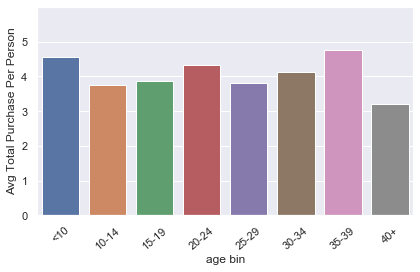

In [12]:
ax2=sns.barplot(Purchasing_Analysis_age.index,bin_ave_total_purchase_pp)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40)
ax2.set_ylim(0,6)
plt.ylabel("Avg Total Purchase Per Person")
plt.tight_layout()
plt.yticks(numpy.arange(0, 6, step=1))
plt.show()

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [13]:
# in order to find top_spender we need to calculate the total spending for indiviuals
# aka sort by "SN" and add the sum&ave price for all SN

spender_data_total=purchase_data.groupby("SN").sum()["Price"].sort_values(ascending=False)

# now we can get the purchase count and average price
spender_data_ave=purchase_data.groupby("SN").mean()["Price"].sort_values(ascending=False)
spender_data_count=purchase_data.groupby("SN").count()["Price"].sort_values(ascending=False)

# create a data frame, sort data and format
top_spender_data=pd.DataFrame({"Purchase Count":spender_data_count,
                         "Average Purchase Price":spender_data_ave,
                         "Total Purchase Value":spender_data_total})
top_spender_data=top_spender_data.sort_values(by=["Total Purchase Value"],ascending=False)
top_spender_data["Average Purchase Price"]=top_spender_data["Average Purchase Price"].map('${:,.2f}'.format)
top_spender_data["Total Purchase Value"]=top_spender_data["Total Purchase Value"].map('${:,.2f}'.format)
top_spender_data.head()

,Purchase Count,Average Purchase Price,Total Purchase Value
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


In [14]:
top_5_total_purchase=spender_data_total.head().sum()
top_purchase=spender_data_total.sum()
top_5_total_purchase_percent=top_5_total_purchase/top_purchase
rest_player=1-top_5_total_purchase
top_5_total_purchase_percent
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 #       autopct="%1.1f%%", shadow=True, startangle=180,radius=2)

0.03149884232509864

## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [15]:
# simliar to above, this cell I use "item Name" to groupby

item_data_total=purchase_data.groupby(["Item ID","Item Name"]).sum()["Price"].sort_values(ascending=False)
#item_data_total=purchase_data.groupby("Item Name").sum()["Price"].sort_values(ascending=False)
item_data_count=purchase_data.groupby(["Item ID","Item Name"]).count()["Price"].sort_values(ascending=False)
#item_data_count=purchase_data.groupby("Item Name").count()["Price"].sort_values(ascending=False)
item_data_mean=purchase_data.groupby(["Item ID","Item Name"]).mean()["Price"].sort_values(ascending=False)
#item_data_mean=purchase_data.groupby("Item Name"]).mean()["Price"].sort_values(ascending=False)


item_data=pd.DataFrame({"Purchase Count":item_data_count,
                         "Item Price":item_data_mean,
                         "Total Purchase Value":item_data_total})
item_data_sort=item_data.sort_values(by=["Purchase Count"],ascending=False)
item_data_sort["Item Price"]=item_data_sort["Item Price"].map('${:,.2f}'.format)
item_data_sort["Total Purchase Value"]=item_data_sort["Total Purchase Value"].map('${:,.2f}'.format)
popular_items=item_data_sort.head()
popular_items
#item_data_total

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


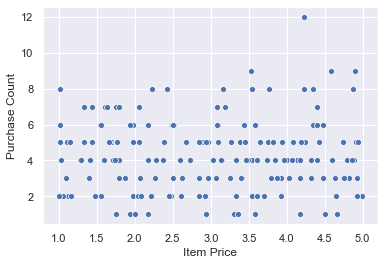

In [16]:
sns.scatterplot(x=item_data_mean, y=item_data_count);
plt.ylabel("Purchase Count")
plt.xlabel("Item Price")
plt.show()


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [17]:
profitable_items=item_data.sort_values(by=["Total Purchase Value"],ascending=False)
profitable_items["Item Price"]=profitable_items["Item Price"].map('${:,.2f}'.format)
profitable_items["Total Purchase Value"]=profitable_items["Total Purchase Value"].map('${:,.2f}'.format)
profitable_items.head()


,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


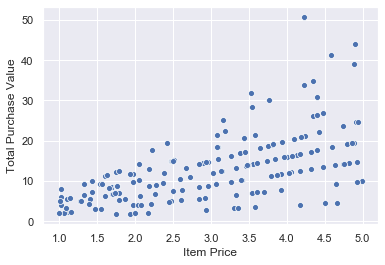

In [43]:
sns.scatterplot(y=item_data_total, x=item_data_mean);
plt.xlabel("Item Price")
plt.ylabel("Total Purchase Value")
plt.show()

#we can see there is some linear relationship between item price and total purchase value

In [33]:
x=item_data_mean
y=item_data_total
numpy.polyfit(numpy.log(x), y, 1)

array([16.05587108, -3.46017085])

In [31]:
y=16.055-3.46log(x)

array([16.05587108, -3.46017085])

In [19]:
#now let use linear regression to make predictions
df_x=pd.DataFrame(item_data_mean)
df_y=pd.DataFrame(item_data_total)
reg=linear_model.LinearRegression()


In [20]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=2)

In [21]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
reg.coef_

array([[6.1800985]])

In [23]:
predict_price=reg.predict(x_test)

In [24]:
predict_price[5]

array([20.12614314])

In [42]:
y_test["predicted price"]=predict_price
y_test

C:\Users\16478\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,,total purchase value,Predicted total purchase value,predicted price
Item ID,Item Name,,,
108,"Extraction, Quickblade Of Trembling Hands",31.77,24.205008,24.205008
48,"Rage, Legacy of the Lone Victor",4.96,4.243290,4.243290
173,Stormfury Longsword,9.86,10.485189,10.485189
86,Stormfury Lantern,6.81,6.282722,6.282722
25,Hero Cane,26.10,23.401595,23.401595
120,Agatha,18.48,20.126143,20.126143
70,Hope's End,4.12,2.883668,2.883668
92,Final Critic,39.04,24.452212,24.452212
17,"Lazarus, Terror of the Earth",6.80,6.220922,6.220922


In [26]:
y_test.rename(columns={"Price":"total purchase value",
                       "predicted price":"Predicted total purchase value"},inplace=True)
y_test["Price"]=popular_items.lookup(popular_items.index,popular_items["Purchase Counts"])
y_test

C:\Users\16478\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


KeyError: 'Purchase Counts'